# EDA : 전복

## features
Sex : 전복 성별(i=infant) / object  
Lenght : 전복 길이 / mm / float  
Diameter : 전복 둘레 / mm / float  
Height : 전복 길이 / mm / float  
Whole Weight : 전복 전체 무게 / grams / float  
Shucked Weight : 껍질을 제외한 무게 / grams / float  
Viscra Weight : 내장 무게 / grams / float  
Shell Weight : 껍질 무게 / grams / float  
Rings : 전복 나이 / int  


## Domain
1. 전복의 나이 판단:
전복의 나이는 보통 그것의 껍질에 있는 고리의 수를 세어 판단합니다.
이것이 'Rings' 피처가 가리키는 것입니다.
따라서 'Rings' 피처는 전복의 나이를 직접적으로 예측하는 데 중요한 변수가 될 수 있습니다.

2. 전복의 성장:
전복은 자신의 생명 동안 계속 성장합니다.
따라서 길이, 둘레, 높이, 그리고 무게와 같은 피처들은 전복의 나이와 밀접한 관련이 있을 수 있습니다.
더 크고 무거운 전복일수록 일반적으로 더 오래된 전복일 것입니다.

3. 전복의 성별:
전복은 성별에 따라 다른 성장 패턴과 생리적 특성을 가질 수 있습니다.
예를 들어, 일부 연구에서는 암컷 전복이 수컷 전복보다 더 빨리 성장하고 더 큰 크기에 도달할 수 있다는 것을 발견했습니다.
따라서 'Sex' 피처는 전복의 나이를 예측하는 데 중요한 역할을 할 수 있습니다.

4. 전복의 무게:
전복의 껍질을 제외한 무게 ('Shucked Weight'), 내장 무게 ('Viscera Weight'),
그리고 껍질 무게 ('Shell Weight')는 전복의 전체 무게 ('Whole Weight')를 구성합니다.
이러한 피처들은 전복의 성장과 밀접한 관련이 있을 수 있으며, 따라서 나이 예측에 중요할 수 있습니다.


## Workflow
1. 기본 통계량 확인
2. 결측치 확인
3. 상관 분석
4. 분포 확인
5. 카테고리별 분석
6. 피처 중요도 분석


## 제언
- 데이터셋 구성 과정에서
  - [데이터에 대한 소개페이지](https://archive.ics.uci.edu/ml/datasets/abalone)를 보면, 결측치가 있는 데이터는 데이터셋 구성 과정에서 제거하였다고 하였는데, 그렇게 제거된 데이터는 대부분 타겟값이 누락된 데이터라고 함
  - 하지만 타겟값이 없는 데이터도 테스트용으로 활용할 수 있기 때문에, 데이터셋 구성과정에서 결측데이터를 삭제하는 것보다 최대한 살려서 사용하는 것이 모델학습에 도움이 될 것이라고 생각 됨
- 스케일링된 데이터에 대한 충분한 고려가 필요
  - [데이터에 대한 소개페이지](https://archive.ics.uci.edu/ml/datasets/abalone)를 보면, 다른 데이터셋과 함께 사용하기 위하여 데이터셋 구성 과정에서 모든 수치형데이터에 200을 나누어서 데이터셋을 구성하였다고 나옴
  - 프로젝트 후반에 들어서, 모델링이 마무리 된 다음에 이러한 내용을 알게되어 모델링 과정에 스케일링된 내용을 고려하지 못함
  - 수치형 데이터를 다시 200을 곱하여 원래 데이터로 복구한 다음에 모델을 학습하면, EDA 과정이라 모델추정 과정에서 더 좋을 것 같음


## Reference
- https://archive.ics.uci.edu/ml/datasets/abalone
  - From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).
  - ANN과 함께 사용하기 위하여 연속형값을 200으로 나누었음
- https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset
- https://www.kaggle.com/code/anmolbajpai/abalone-age-prediction-regression
- https://rpubs.com/shihui17170153/abalone
- https://rstudio-pubs-static.s3.amazonaws.com/378381_1221e0d1034b4020a38a862a76890bb6.html

## EDA

- EDA 결과
  - `성별` 원핫 인코딩
  - `껍질의 넓이`, `껍질의 둘레` 특성 생성
  - 전복 전체 무게가 전복살, 전복내장, 전복껍질 무게들의 합보다 작은 경우 이상데이터로 간주하고 삭제
  - 데이터 정규화 `MinMaxScaler`


In [2]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA


# 각종 변수 선언
csv_path = '../data/Regression_data.csv'
save_path = '../../../../../Git_Blog/assets/images/aib/GPTeachersDay/'
save_mode = 0

In [3]:
df = pd.read_csv(csv_path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Data Structure
- 데이터 구조
  - 데이터 개수 : 4,177
  - 특성 개수 : 8
  - 타겟 : Rings
- 결측 없음
- 중복값 없음
- `Sex` 특성 : object
  - 타입변경 : 정수형으로 라벨인코딩 또는 원핫인코딩 필요함

In [4]:
print(f'✅ 중복값 개수 : {df.duplicated().sum()}')
df.info()

✅ 중복값 개수 : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Target
<p>• 데이터의 전복은 7~11개의 Ring이 있습니다.</p>
<p>• 전복의 수명이 <a href="http://www.mdjournal.kr/news/articleView.html?idxno=3749" target="_blank">약12년[참조]</a>이라는 점을 감안하면, 20개 이상의 Ring은 <b>이상치일 가능성</b>이 있습니다.</p>

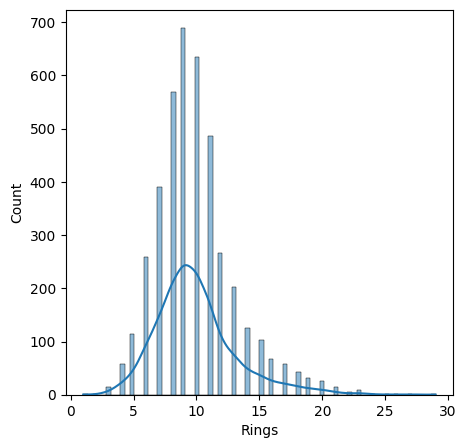

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(df.Rings, kde=True)
plt.show()

if save_mode:
    fig.savefig(save_path + 'abalone_target.png', dpi=80, bbox_inches='tight')

### Features
<p>• 'Ring' 특성에 너무 작거나 너무 큰 <b>이상치</b> 데이터가 보입니다.</p>
<p>• 대체로 어린전복(초록)은 수컷(파랑)이나 암컷(주황)과는 다른 분포를 보입니다.</p>
<p>• 전복의 특성은 대체로 <b>양의 상관관계</b>를 보입니다.</p>
<p>• 'Length', 'Diameter', 'Height' 등의 특성에서 약2개 데이터는 분포에서 벗어난 데이터입니다.</p>

In [11]:
df_origin = df.iloc[:,1:-1]*200
df_origin.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172
std,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000
50%,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000
75%,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000


In [64]:
df.describe(include="all")

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


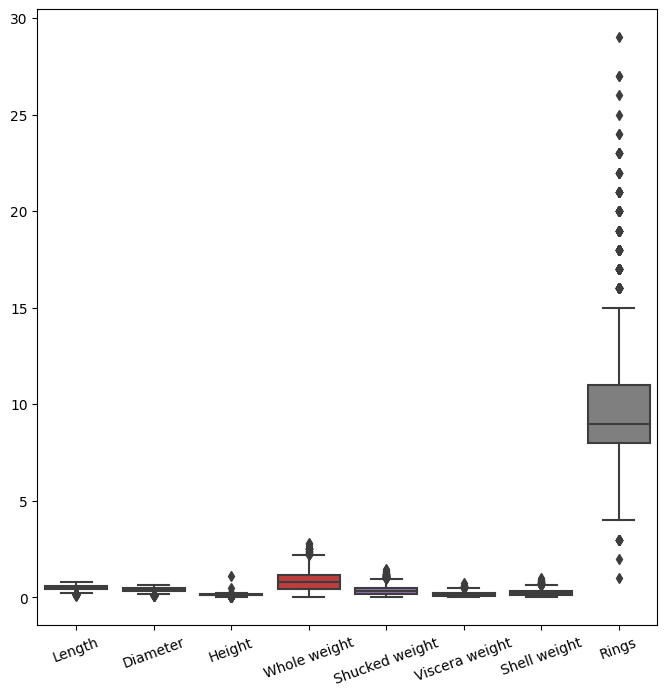

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df)
ax.set_xticklabels(list(df.columns)[1:], rotation=20)
if save_mode:
    fig.savefig(save_path + 'abalone_boxplot.png', dpi=80, bbox_inches='tight')

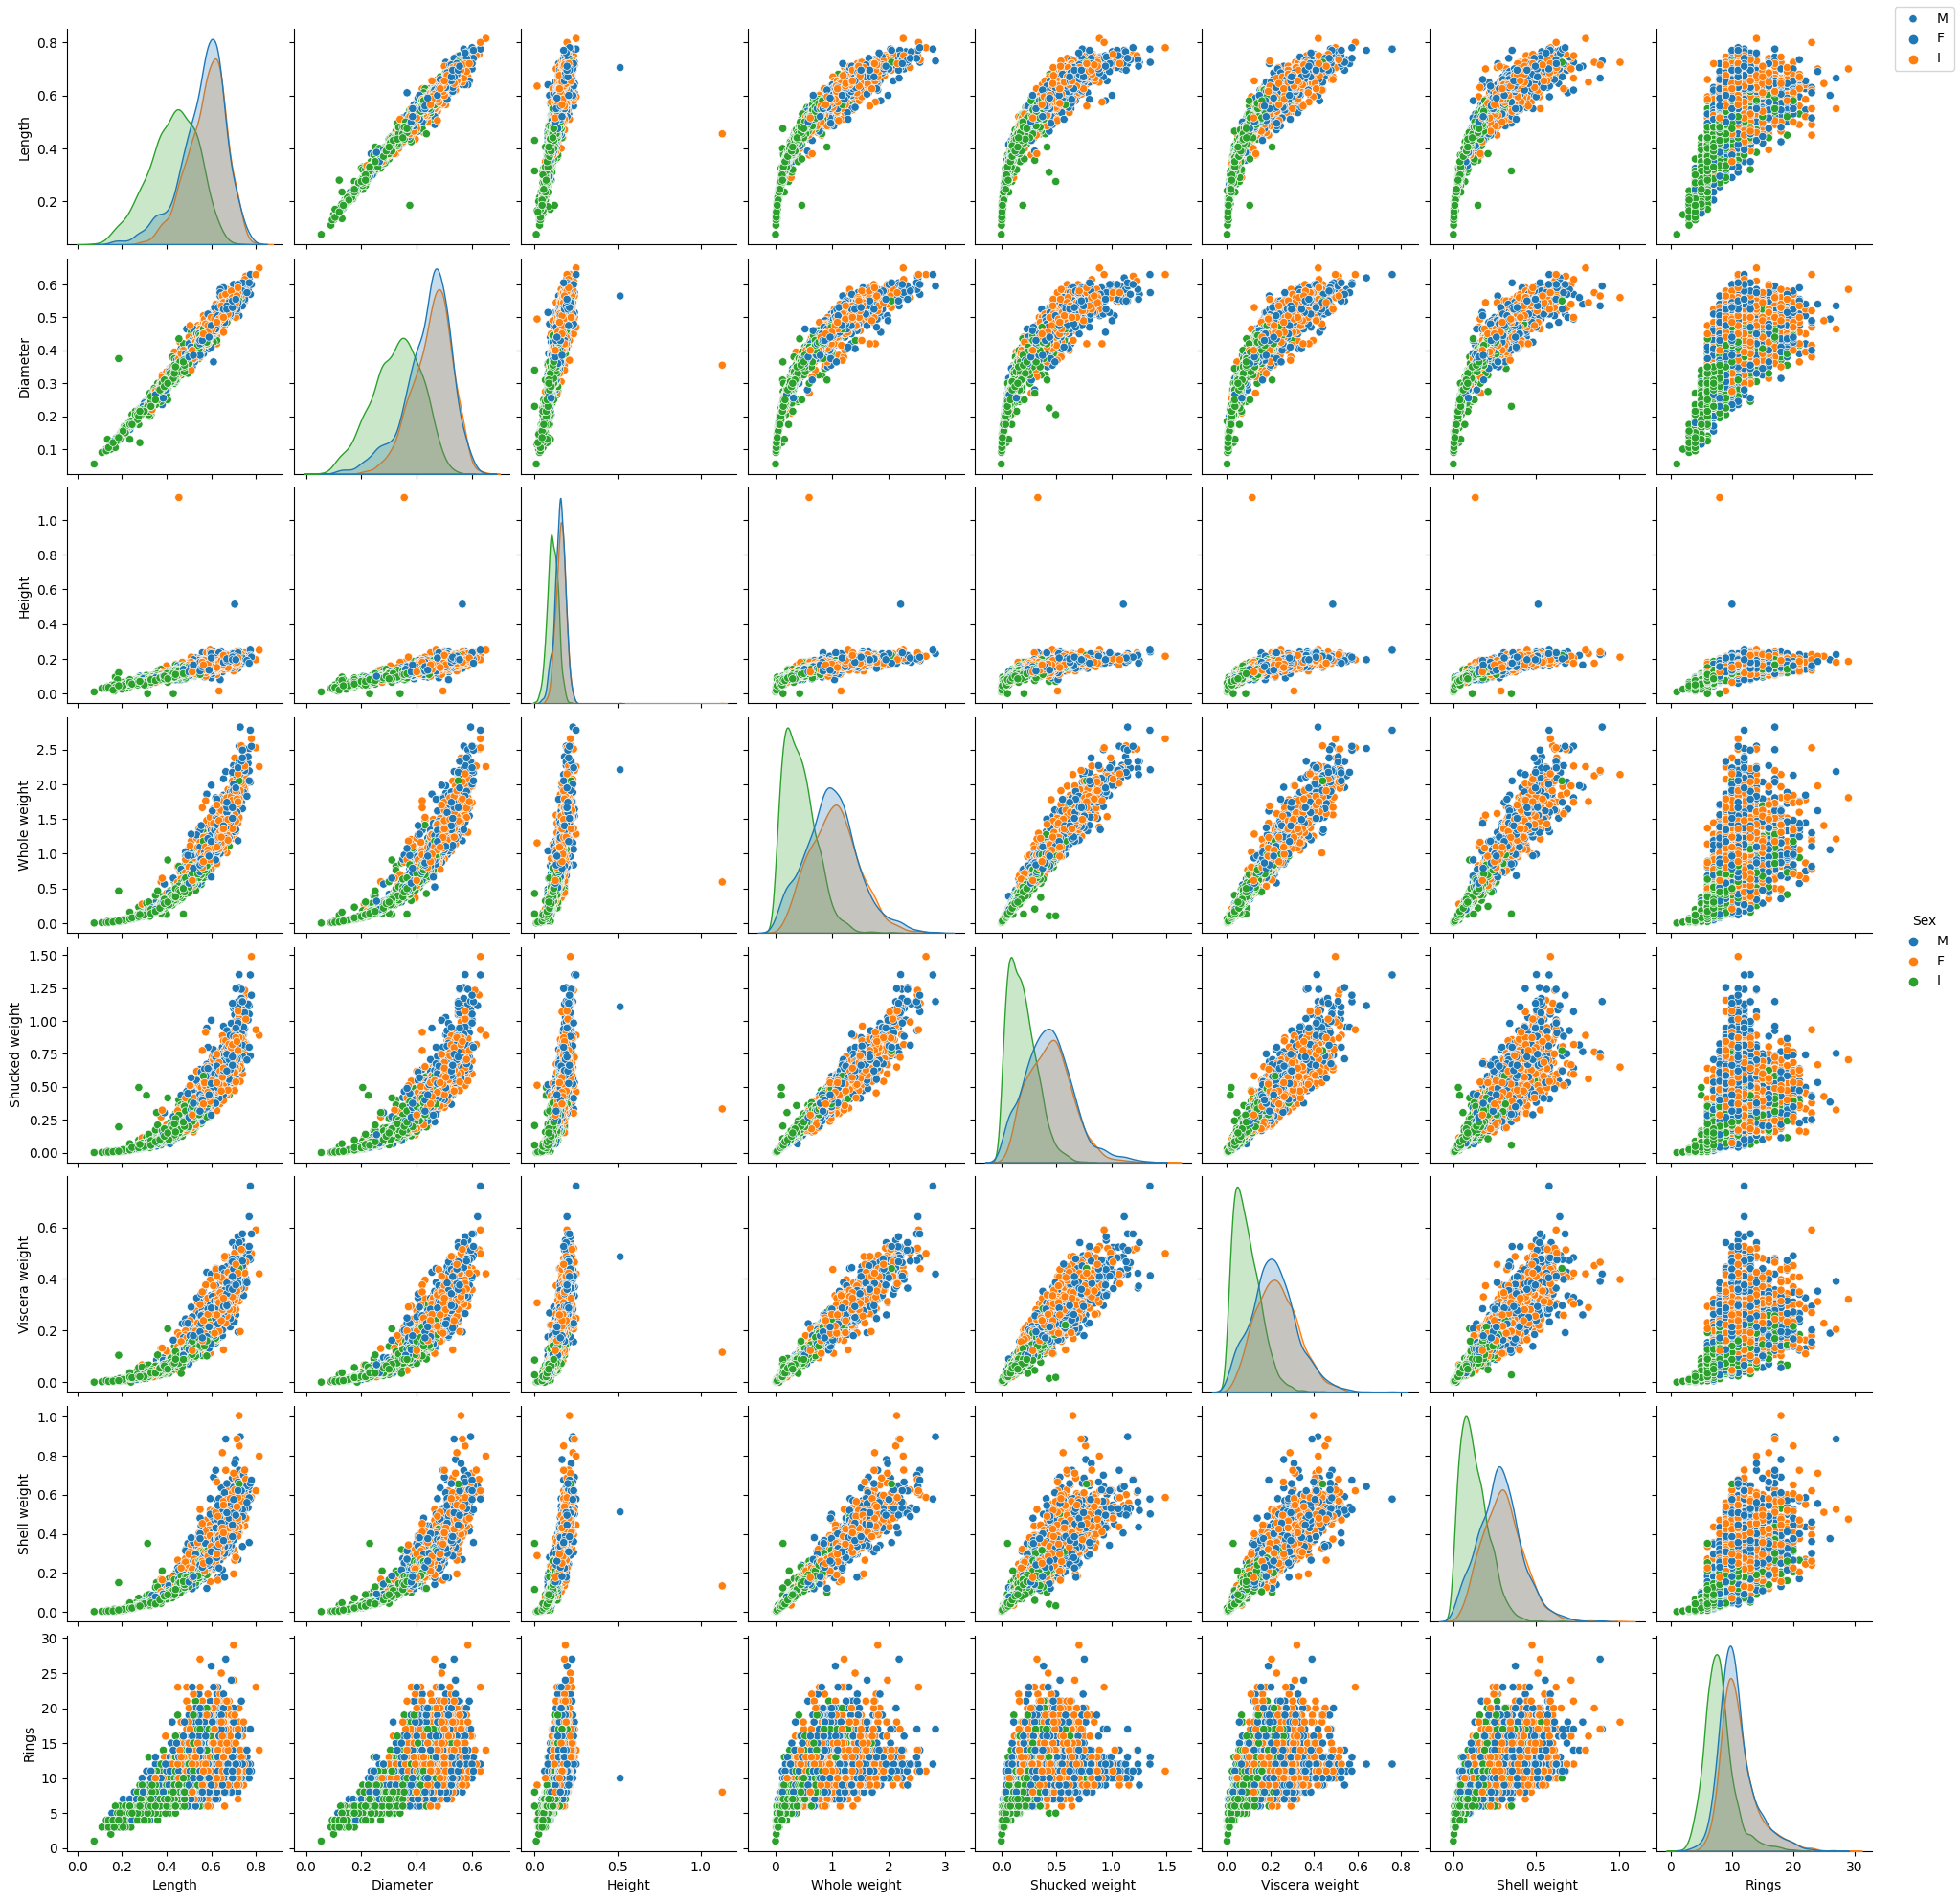

In [66]:
_ = sns.pairplot(df, hue='Sex')
_.fig.legend(labels = ["M","F","I"], loc='upper right', ncol=1)

if save_mode:
    _.savefig(save_path + 'abalone_pairplot.png', dpi=80, bbox_inches='tight')

### Correlation
<p>• 독립변수 끼리 강한 상관관계를 보이기 때문에, <b>다중공선성의 문제</b>를 고려할 수 있습니다.</p>
<p>• 독립변수와 종속변수사이의 상관관계가 강하지 않아서 <b>데이터누수의 문제는 없어</b>보입니다.</p>

C:\Users\leeyeonjun85\AppData\Local\Temp\ipykernel_38776\4154798145.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\leeyeonjun85\AppData\Local\Temp\ipykernel_38776\4154798145.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


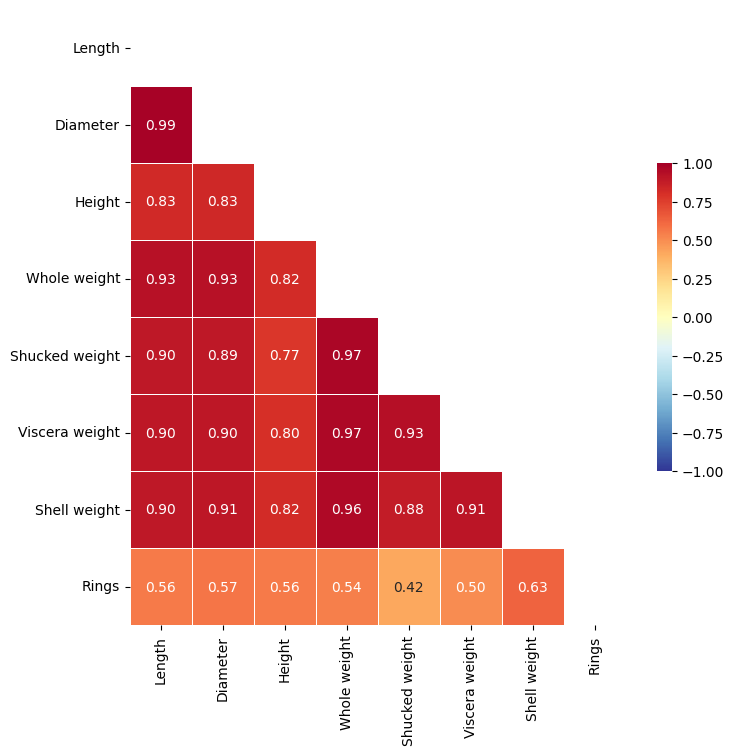

In [67]:
fig, ax = plt.subplots(figsize=(8, 8))

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            cmap="RdYlBu_r",
            annot=True,
            mask=mask,
            fmt='.2f',
            linewidths=.5,
            vmin = -1, vmax = 1,
            cbar_kws={"shrink": .5})

plt.show()

if save_mode:
    fig.savefig(save_path + 'abalone_heatmap.png', dpi=80, bbox_inches='tight')

### 이상 데이터

In [68]:
# 전복 전체 무게가 살 + 내장 + 껍질보다 적게 나가는 경우는 말이 안됨
minus_list = df['Whole weight'] - (df['Shucked weight'] + df['Viscera weight'] + df['Shell weight'])

# 전복 전체 무게 - (살 + 내장 + 껍질) 가 음수인 경우
minus_list = minus_list[minus_list < 0]
print(len(minus_list))

155


### Export Report

In [69]:
from ydata_profiling import ProfileReport
df_report = ProfileReport(df, title='Abalone Profile Report')

if save_mode:
    df_report.to_file('eda_abalone.html')

## ML Model Predict

<p>• 기존 모델의 성능</p>
<p class="mx-4">– Epoch : 10 , lr : 0.001</p>
<p class="mx-4">– Train Loss / Accuracy : 5.863 / 0.824</p>
<p class="mx-4">– Test Accuracy : 0.827</p>
<p>• 기존 모델과 머신러닝 모델과 성능 비교</p>
<p class="mx-4">– 대표적인 머신러닝 모델인 <code>Linear Regression</code>, 앙상블 가운데 베깅기법의 대표적 모델인 <code>Random Forest</code>, 부스팅기법의 대표적 모델인 <code>Gradient Boosting</code> 사용</p>
<p class="mx-4">– <b>sci-kit Learn</b> 라이브러리 활용</p>

In [85]:
def load_dataset(csv_path, TRAIN_RATIO=0.8):
    
    # 데이터셋 로드
    df = pd.read_csv(csv_path)
    
    # 전체무게가 음수인 경우 삭제
    minus_list = df['Whole weight'] - (df['Shucked weight'] + df['Viscera weight'] + df['Shell weight'])
    minus_list = minus_list[minus_list < 0]
    df.drop(minus_list.index, axis=0, inplace=True)
    
    # 껍질의 넓이 ( a * b * π)
    df['Area'] = 0.5 * df['Length'] * 0.5 * df['Diameter'] * np.pi
        
    # 껍질의 둘레 (근사) ( 2π*(0.5 * √(a^2 + b^2)))
    df['Perimeter'] = np.pi * np.sqrt(0.5 * ((df['Length'] ** 2) + (df['Diameter'] ** 2)))
    
    # 성별 원핫 인코딩
    df=pd.get_dummies(df,columns=['Sex'])
    
    # 학습 데이터 분리
    X = df.drop('Rings', axis=1)
    y = df['Rings'].astype('float32')
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO, random_state = 83)
    
    # MinMaxScaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = load_dataset(csv_path)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

def get_metrics(model, X, y, cv_n=3):
    y_pred=model.predict(X)
    
    r2 = metrics.r2_score(y, y_pred)
    mae = metrics.mean_absolute_error(y, y_pred)
    mse = metrics.mean_squared_error(y, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    
    print('r2_score                 :', r2)
    print('Mean Absolute Error      :', mae)
    print('Mean Squared Error       :', mse)
    print('Root Mean Squared Error  :', rmse)
    return r2, mae, mse, rmse

(3217, 12) (805, 12) (3217,) (805,)


In [89]:
df.describe(include="all")

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Area,Perimeter,Sex_F,Sex_I,Sex_M
count,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000
mean,0.527256,0.410470,0.140462,0.840869,0.363263,0.182497,0.241525,10.002984,0.178895,1.484664,0.318001,0.312282,0.369717
std,0.117982,0.097604,0.041455,0.488602,0.220715,0.109262,0.138670,3.221646,0.073314,0.338807,0.465758,0.463482,0.482788
min,0.110000,0.090000,0.000000,0.008000,0.002500,0.000500,0.003000,2.000000,0.007775,0.315726,0.000000,0.000000,0.000000
25%,0.455000,0.350000,0.115000,0.454625,0.190500,0.096000,0.134500,8.000000,0.125467,1.277329,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.145000,0.811750,0.341250,0.172500,0.236000,10.000000,0.183587,1.542143,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.162500,0.506500,0.255375,0.330000,11.000000,0.233165,1.737169,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,0.416065,2.315766,1.000000,1.000000,1.000000


In [87]:
X_train.describe(include="all")

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Area,Perimeter,Sex_F,Sex_I,Sex_M
count,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000
mean,0.592266,0.572708,0.124291,0.300243,0.242869,0.238397,0.270113,0.419370,0.584881,0.319552,0.315200,0.365247
std,0.166734,0.173239,0.036926,0.175297,0.148225,0.144139,0.155781,0.178950,0.168604,0.466376,0.464668,0.481574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.489362,0.464286,0.101770,0.161645,0.126893,0.124011,0.149660,0.289122,0.480792,0.000000,0.000000,0.000000
50%,0.617021,0.598214,0.128319,0.289554,0.226860,0.223615,0.263039,0.426517,0.610772,0.000000,0.000000,0.000000
75%,0.716312,0.696429,0.146018,0.417644,0.339280,0.335092,0.370748,0.553429,0.711186,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
X_test.describe(include="all")

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Area,Perimeter,Sex_F,Sex_I,Sex_M
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,0.590203,0.570508,0.124350,0.301588,0.242804,0.237025,0.271733,0.418092,0.582762,0.311801,0.300621,0.387578
std,0.169883,0.178538,0.035733,0.180335,0.150080,0.144253,0.162947,0.182103,0.172640,0.463517,0.458813,0.487500
min,0.028369,0.017857,0.026549,0.001804,0.001346,-0.001979,0.001134,0.005963,0.024308,0.000000,0.000000,0.000000
25%,0.482270,0.464286,0.101770,0.158578,0.126220,0.121372,0.145125,0.286236,0.478760,0.000000,0.000000,0.000000
50%,0.624113,0.607143,0.128319,0.297312,0.230226,0.226913,0.267007,0.435895,0.617564,0.000000,0.000000,0.000000
75%,0.716312,0.696429,0.146018,0.412412,0.339280,0.325198,0.372449,0.546504,0.706864,1.000000,1.000000,1.000000
max,0.978723,0.964286,0.455752,1.016598,0.832716,0.775726,1.136054,0.950466,0.973145,1.000000,1.000000,1.000000


### Base Model

- 평균 기준모델 사용

In [71]:
# Base Model : 평균
y_mean = np.mean(y_train)
y_pred = [y_mean] * len(y_train)

print('r2_score                 :', metrics.r2_score(y_train, y_pred))
print('Mean Absolute Error      :', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error       :', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

r2_score                 : 0.0
Mean Absolute Error      : 2.343343
Mean Squared Error       : 10.275687
Root Mean Squared Error  : 3.2055712


### Linear Regression Model

In [72]:
model_ln=LinearRegression() # initialzing the model
model_ln.fit(X_train, y_train)

ln_r2_train, ln_mae_train, ln_mse_train, ln_rmse_train = get_metrics(model_ln, X_train, y_train)
print('='*100)
ln_r2_test, ln_mae_test, ln_mse_test, ln_rmse_test = get_metrics(model_ln, X_test, y_test)

r2_score                 : 0.5555130950718726
Mean Absolute Error      : 1.5591389493316754
Mean Squared Error       : 4.567408691254468
Root Mean Squared Error  : 2.137149665150868
r2_score                 : 0.5307076694021904
Mean Absolute Error      : 1.578707298136646
Mean Squared Error       : 5.058411175271739
Root Mean Squared Error  : 2.2490911887408522


### Random Forest Regressor Model

In [73]:
model_rf = RandomForestRegressor (random_state=42)
model_rf.fit(X_train, y_train)

rf_r2_train, rf_mae_train, rf_mse_train, rf_rmse_train = get_metrics(model_rf, X_train, y_train)
print('='*100)
rf_r2_test, rf_mae_test, rf_mse_test, rf_rmse_test = get_metrics(model_rf, X_test, y_test)

r2_score                 : 0.9366511538976758
Mean Absolute Error      : 0.570932545850171
Mean Squared Error       : 0.6509529686042898
Root Mean Squared Error  : 0.8068165644087197
r2_score                 : 0.5058422992319155
Mean Absolute Error      : 1.5945465838509318
Mean Squared Error       : 5.326430186335404
Root Mean Squared Error  : 2.307906017656569


### Gradient Boosting Regressor Model

In [74]:
model_gb = GradientBoostingRegressor (random_state=42)
model_gb.fit(X_train, y_train)

gb_r2_train, gb_mae_train, gb_mse_train, gb_rmse_train = get_metrics(model_gb, X_train, y_train)
print('='*100)
gb_r2_test, gb_mae_test, gb_mse_test, gb_rmse_test = get_metrics(model_gb, X_test, y_test)

r2_score                 : 0.6649401903820522
Mean Absolute Error      : 1.3409297234322486
Mean Squared Error       : 3.44297001682544
Root Mean Squared Error  : 1.8555241892320995
r2_score                 : 0.5241772284370954
Mean Absolute Error      : 1.5459653127901625
Mean Squared Error       : 5.128801534123779
Root Mean Squared Error  : 2.2646857473220825


### ML Model Compare

<p>• 머신러닝 모델들의 MSE는 레거시모델(5.863)과 비슷한 수준입니다.</p>
<p>• 머신러닝 모델들의 R2는 레거시모델의 Accuracy(0.824)보다 낮습니다.</p>
<p>• Random Forest 모델 과적합이 크게 발생하였습니다.</p>

C:\Users\leeyeonjun85\AppData\Local\Temp\ipykernel_38776\3222017088.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 2, 1)
C:\Users\leeyeonjun85\AppData\Local\Temp\ipykernel_38776\3222017088.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label, rotation=20, fontsize=12)
C:\Users\leeyeonjun85\AppData\Local\Temp\ipykernel_38776\3222017088.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label, rotation=20, fontsize=12)


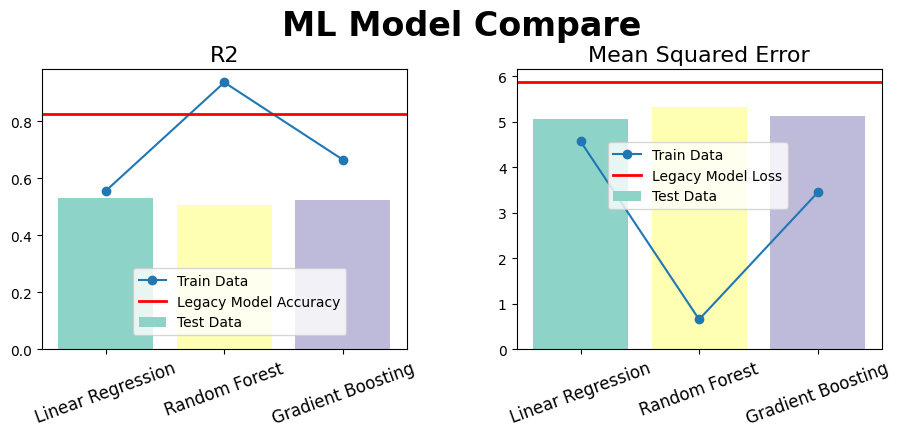

In [75]:
# Metrics to DataFrame
metrics_df = pd.DataFrame({
    'Train R2'                  : [ln_r2_train, rf_r2_train, gb_r2_train],
    'Test R2'                   : [ln_r2_test, rf_r2_test, gb_r2_test],
    'Train Mean Squared Error'  : [ln_mse_train, rf_mse_train, gb_mse_train],
    'Test Mean Squared Error'   : [ln_mse_test, rf_mse_test, gb_mse_test],
})

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('ML Model Compare', fontsize = 24, fontweight = 'bold', y = 1)

x_label = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

ax = plt.subplot(1, 2, 1)
plt.title('R2', fontsize = 16, y = 1)
plt.bar(x_label, metrics_df['Test R2'], color=sns.color_palette('Set3'), label='Test Data')
plt.plot(metrics_df['Train R2'], marker='o', label='Train Data')
plt.axhline(y=0.824, color='r', linewidth=2, label='Legacy Model Accuracy')
ax.set_xticklabels(x_label, rotation=20, fontsize=12)
plt.legend(loc=(0.25, 0.05))

ax = plt.subplot(1, 2, 2)
plt.title('Mean Squared Error', fontsize = 16, y = 1)
plt.bar(x_label, metrics_df['Test Mean Squared Error'], color=sns.color_palette('Set3'), label='Test Data')
plt.plot(metrics_df['Train Mean Squared Error'], marker='o', label='Train Data')
plt.axhline(y=5.863, color='r', linewidth=2, label='Legacy Model Loss')
ax.set_xticklabels(x_label, rotation=20, fontsize=12)
plt.legend(loc=(0.25, 0.5))

plt.subplots_adjust(right=0.85, left=0.15, top=0.85, bottom=0.15, wspace=0.3, hspace=0.2)
plt.show()

if save_mode:
    fig.savefig(save_path + 'abalone_ml_models.png', dpi=80, bbox_inches='tight')

## Feature Importance

<p>• 앙상블모델에 영향을 미치는 특성중요도를 계산합니다.</p>
<p>• Mean Decrease Impurity 방식의 특성중요도를 사용합니다.</p>
<p>• 그 결과, <b>Shell weight</b>, <b>Shucked weight</b> 특성이 타겟 예측에 중요한 특성으로 나타났습니다.</p>

           feature       MDI
6     Shell weight  0.479049
4   Shucked weight  0.164684
3     Whole weight  0.075865
5   Viscera weight  0.064753
2           Height  0.050581
7             Area  0.036222
1         Diameter  0.035703
8        Perimeter  0.035531
0           Length  0.027166
10           Sex_I  0.018666
9            Sex_F  0.005947
11           Sex_M  0.005832


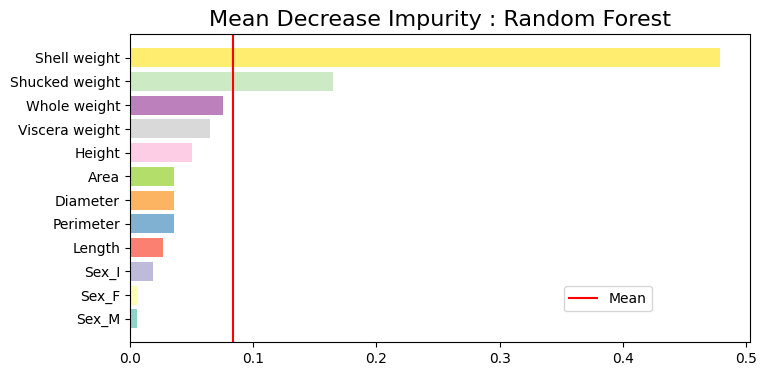

In [76]:
# Mean Decrease Impurity
MDI_rf = pd.DataFrame({ 'feature':X_test.columns, 'MDI':model_rf.feature_importances_}).sort_values(by='MDI', ascending=True)
print(MDI_rf.sort_values(by='MDI', ascending=False))

# Graph
fig = plt.figure(figsize=(8, 4))
plt.title('Mean Decrease Impurity : Random Forest', fontsize=16)
plt.barh(MDI_rf.feature, MDI_rf.MDI, color=sns.color_palette('Set3'))
plt.axvline(MDI_rf.MDI.mean(), color="red", label="Mean")
plt.legend(fontsize=10, loc=(0.7, 0.1))

plt.show()

if save_mode:
    fig.savefig(save_path + 'abalone_mdi_rf.png', dpi=80, bbox_inches='tight')

           feature       MDI
6     Shell weight  0.647159
4   Shucked weight  0.184369
3     Whole weight  0.037544
2           Height  0.037448
10           Sex_I  0.024428
1         Diameter  0.017927
7             Area  0.015619
5   Viscera weight  0.012058
0           Length  0.010152
8        Perimeter  0.010012
9            Sex_F  0.003135
11           Sex_M  0.000150


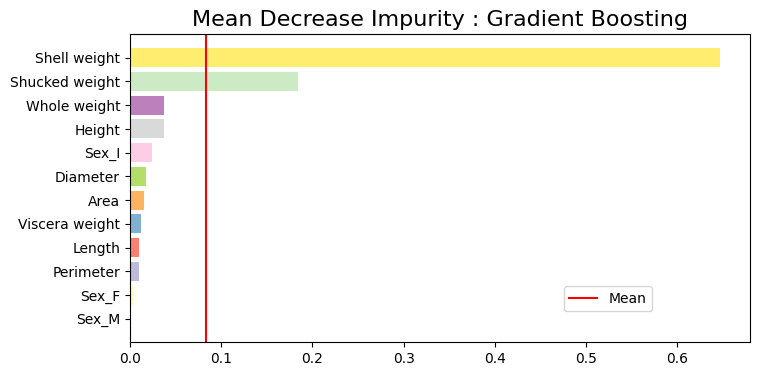

In [77]:
# Mean Decrease Impurity
MDI_gb = pd.DataFrame({ 'feature':X_test.columns, 'MDI':model_gb.feature_importances_}).sort_values(by='MDI', ascending=True)
print(MDI_gb.sort_values(by='MDI', ascending=False))

# Graph
fig = plt.figure(figsize=(8, 4))
plt.title('Mean Decrease Impurity : Gradient Boosting', fontsize=16)
plt.barh(MDI_gb.feature, MDI_gb.MDI, color=sns.color_palette('Set3'))
plt.axvline(MDI_gb.MDI.mean(), color="red", label="Mean")
plt.legend(fontsize=10, loc=(0.7, 0.1))

plt.show()

if save_mode:
    fig.savefig(save_path + 'abalone_mdi_gb.png', dpi=80, bbox_inches='tight')

## PCA

- 주요인분석 결과 3개 요인이 94%의 분산을 설명함
- 3개 요인으로 머신러닝 분석 결과, 모든 특성을 사용했을 때보다 성능이 오르지 않음

In [78]:
def load_dataset(csv_path, TRAIN_RATIO=0.8):
    
    global X, y, df
    
    # 데이터셋 로드
    df = pd.read_csv(csv_path)
    
    # 전체무게가 음수인 경우 삭제
    minus_list = df['Whole weight'] - (df['Shucked weight'] + df['Viscera weight'] + df['Shell weight'])
    minus_list = minus_list[minus_list < 0]
    df.drop(minus_list.index, axis=0, inplace=True)
    
    # 껍질의 넓이 ( a * b * π)
    df['Area'] = 0.5 * df['Length'] * 0.5 * df['Diameter'] * np.pi
        
    # 껍질의 둘레 (근사) ( 2π*(0.5 * √(a^2 + b^2)))
    df['Perimeter'] = np.pi * np.sqrt(0.5 * ((df['Length'] ** 2) + (df['Diameter'] ** 2)))
    
    # 성별 원핫 인코딩
    df=pd.get_dummies(df,columns=['Sex'])
    
    # 학습 데이터 분리
    X = df.drop('Rings', axis=1)
    y = df['Rings'].astype('float32')

load_dataset(csv_path)

def pca_data(data):
    # StandardScaler()를 사용하여 데이터 표준화 
    scaler = StandardScaler()
    Z = scaler.fit_transform(data)

    # 표준화한 데이터에 대하여 pca 시행 
    pca = PCA()
    pca.fit(Z)
    B = pca.transform(Z)
    return pca, B

pca, pca_X = pca_data(X)

TRAIN_RATIO=0.8
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_X, y, train_size=TRAIN_RATIO, random_state = 83)
print(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

(3217, 12) (805, 12) (3217,) (805,)


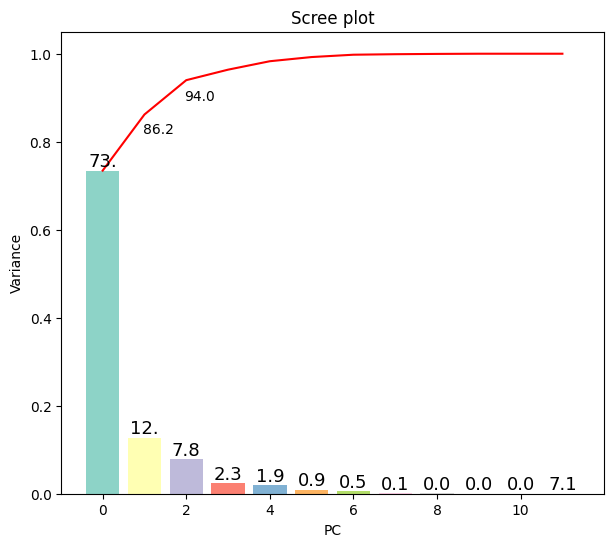

In [79]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    fig, ax = plt.subplots(figsize=(7, 6))
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = sns.color_palette('Set3'))
    ax.plot(ind, cumvals, color = 'r')
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
    
    plt.text(ind[1]*0.97, cumvals[1]*0.95, '%.1f'%(cumvals[1]*100))
    plt.text(ind[2]*0.97, cumvals[2]*0.95, '%.1f'%(cumvals[2]*100))

    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
    if save_mode:
        fig.savefig(save_path + 'abalone_pca_scree_plot.png', dpi=80, bbox_inches='tight')
  
scree_plot(pca)

In [80]:
model_ln_pca=LinearRegression() # initialzing the model
model_ln_pca.fit(X_train_pca, y_train_pca)

ln_r2_train_pca, ln_mae_train_pca, ln_mse_train_pca, ln_rmse_train_pca = get_metrics(model_ln_pca, X_train_pca, y_train)
print('='*100)
ln_r2_test_pca, ln_mae_test_pca, ln_mse_test_pca, ln_rmse_test_pca = get_metrics(model_ln_pca, X_test_pca, y_test_pca)

r2_score                 : 0.5555122103271448
Mean Absolute Error      : 1.5588563575768843
Mean Squared Error       : 4.567417782615124
Root Mean Squared Error  : 2.1371517921324923
r2_score                 : 0.5304899635826723
Mean Absolute Error      : 1.5793162085147912
Mean Squared Error       : 5.0607577841519005
Root Mean Squared Error  : 2.249612807607545


In [81]:
model_rf_pca = RandomForestRegressor (random_state=42)
model_rf_pca.fit(X_train_pca, y_train_pca)

rf_r2_train_pca, rf_mae_train_pca, rf_mse_train_pca, rf_rmse_train_pca = get_metrics(model_rf_pca, X_train_pca, y_train_pca)
print('='*100)
rf_r2_test_pca, rf_mae_test_pca, rf_mse_test_pca, rf_rmse_test_pca = get_metrics(model_rf_pca, X_test_pca, y_test_pca)

r2_score                 : 0.9399678756819984
Mean Absolute Error      : 0.5558719303699099
Mean Squared Error       : 0.6168713708423998
Root Mean Squared Error  : 0.7854115932696689
r2_score                 : 0.5375433282755961
Mean Absolute Error      : 1.5563726708074535
Mean Squared Error       : 4.984730931677019
Root Mean Squared Error  : 2.2326510994055964


In [82]:
model_gb_pca = GradientBoostingRegressor (random_state=42)
model_gb_pca.fit(X_train_pca, y_train_pca)

gb_r2_train_pca, gb_mae_train_pca, gb_mse_train_pca, gb_rmse_train_pca = get_metrics(model_gb_pca, X_train_pca, y_train_pca)
print('='*100)
gb_r2_test_pca, gb_mae_test_pca, gb_mse_test_pca, gb_rmse_test_pca = get_metrics(model_gb_pca, X_test_pca, y_test_pca)

r2_score                 : 0.699261854248294
Mean Absolute Error      : 1.28157219977121
Mean Squared Error       : 3.090291312227078
Root Mean Squared Error  : 1.7579224420397728
r2_score                 : 0.544146511458025
Mean Absolute Error      : 1.510139004334701
Mean Squared Error       : 4.913556498547426
Root Mean Squared Error  : 2.21665434800905


C:\Users\leeyeonjun85\AppData\Local\Temp\ipykernel_38776\38650778.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 2, 1)
C:\Users\leeyeonjun85\AppData\Local\Temp\ipykernel_38776\38650778.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label, rotation=20, fontsize=12)
C:\Users\leeyeonjun85\AppData\Local\Temp\ipykernel_38776\38650778.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label, rotation=20, fontsize=12)


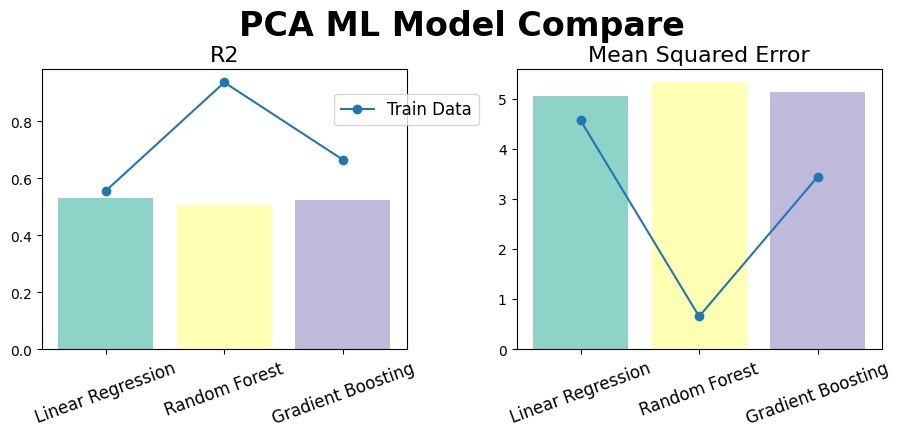

In [83]:
# Metrics to DataFrame
metrics_df = pd.DataFrame({
    'Train R2'                  : [ln_r2_train, rf_r2_train, gb_r2_train],
    'Test R2'                   : [ln_r2_test, rf_r2_test, gb_r2_test],
    'Train Mean Squared Error'  : [ln_mse_train, rf_mse_train, gb_mse_train],
    'Test Mean Squared Error'   : [ln_mse_test, rf_mse_test, gb_mse_test],
})

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('PCA ML Model Compare', fontsize = 24, fontweight = 'bold', y = 1)

x_label = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

ax = plt.subplot(1, 2, 1)
plt.title('R2', fontsize = 16, y = 1)
plt.bar(x_label, metrics_df['Test R2'], color=sns.color_palette('Set3'))
plt.plot(metrics_df['Train R2'], marker='o', label='Train Data')
ax.set_xticklabels(x_label, rotation=20, fontsize=12)

ax = plt.subplot(1, 2, 2)
plt.title('Mean Squared Error', fontsize = 16, y = 1)
plt.bar(x_label, metrics_df['Test Mean Squared Error'], color=sns.color_palette('Set3'))
plt.plot(metrics_df['Train Mean Squared Error'], marker='o', label='Train Data')
ax.set_xticklabels(x_label, rotation=20, fontsize=12)

plt.legend(fontsize=12, loc=(-0.5, 0.8))
plt.subplots_adjust(right=0.85, left=0.15, top=0.85, bottom=0.15, wspace=0.3, hspace=0.2)
plt.show()

if save_mode:
    fig.savefig(save_path + 'abalone_pca_ml_models.png', dpi=80, bbox_inches='tight')

In [84]:
metrics_df = pd.DataFrame({
    'score_name' : [
                    'R2', 'R2', 
                    'R2', 'R2', 
                    'R2', 'R2', 
                    'Mean Squared Error', 'Mean Squared Error', 
                    'Mean Squared Error', 'Mean Squared Error', 
                    'Mean Squared Error', 'Mean Squared Error', 
                    ],
    'model_name' : [
                    'Linear Regression', 'Linear Regression', 
                    'Random Forest', 'Random Forest', 
                    'Gradient Boosting', 'Gradient Boosting', 
                    'Linear Regression', 'Linear Regression', 
                    'Random Forest', 'Random Forest', 
                    'Gradient Boosting', 'Gradient Boosting', 
                    ],
    'data_name' : [
                    'Train', 'Test', 
                    'Train', 'Test', 
                    'Train', 'Test', 
                    'Train', 'Test', 
                    'Train', 'Test', 
                    'Train', 'Test', 
                    ],
    'Whole Features' : [
                    ln_mse_train, ln_mse_test,
                    rf_mse_train, rf_mse_test,
                    gb_mse_train, gb_mse_test,
                    ln_r2_train, ln_r2_test,
                    rf_r2_train, rf_r2_test,
                    gb_r2_train, gb_r2_test,
                        ],
    'PCA of Whole Features' : [
                    ln_mse_train_pca, ln_mse_test_pca,
                    rf_mse_train_pca, rf_mse_test_pca,
                    gb_mse_train_pca, gb_mse_test_pca,
                    ln_r2_train_pca, ln_r2_test_pca,
                    rf_r2_train_pca, rf_r2_test_pca,
                    gb_r2_train_pca, gb_r2_test_pca,
                                ],
})
metrics_df = metrics_df.set_index(['score_name','model_name','data_name'])

if save_mode:
    metrics_df.style.background_gradient(axis=1).to_excel(save_path + 'abalone_pca_compare.xlsx')

metrics_df.style.background_gradient(axis=1)